# Loan Data Exploration

## Wrangling

This document explores a dataset containing 113,937 loans with 81 variables (columns) on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, etc..

This dataset would seem to be for personal loans and not vehicle or other loans. This is an assumption and just brought up to try to understand the data.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [78]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [79]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.head(6))

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                

In [6]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan_sub = loan[cols]

In [7]:
loan_sub.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed


In [8]:
# descriptive statistics for numeric variables
loan_sub.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term
count,113937.00000,113912.000000,1.139370e+05,113937.000000
mean,8337.01385,0.218828,5.608026e+03,40.830248
std,6245.80058,0.080364,7.478497e+03,10.436212
min,1000.00000,0.006530,0.000000e+00,12.000000
25%,4000.00000,0.156290,3.200333e+03,36.000000
50%,6500.00000,0.209760,4.666667e+03,36.000000
75%,12000.00000,0.283810,6.825000e+03,36.000000
max,35000.00000,0.512290,1.750003e+06,60.000000


In [9]:
# Remove loans with missing borrower APR information
loan_sub = loan_sub[~loan_sub.BorrowerAPR.isna()]

### What is the structure of your dataset?

The dataset contains 113,937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and others)

### What is/are the main feature(s) of interest in your dataset?

Since interest on a loan is one the most importance factors, I am most interested in determining what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the total loan amount will have a negative effect on the APR of the loan: the larger the total loan amount, the lower the APR. I also believe that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have significant effects on the APR.

## Univariate Exploration

Let's start by looking at the distribution of the main variable of interest , borrower APR.

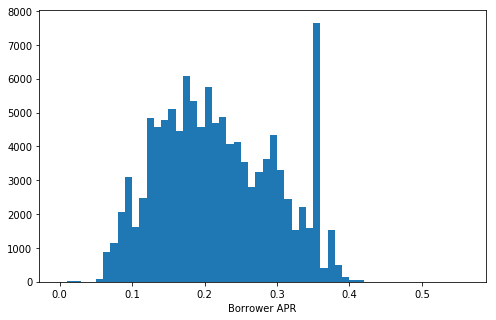

In [80]:
bins = np.arange(0, loan_sub.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.  

In [81]:
# Check loans with APR greater than 0.43
loan_sub[loan_sub.BorrowerAPR>0.43]

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
18326,3000,0.45857,10000.000000,36,NaN,NaN
22195,1789,0.46201,2916.666667,36,NaN,NaN
36018,1500,0.51229,2838.000000,36,NaN,NaN
56761,3000,0.50633,0.000000,36,NaN,NaN
82043,3000,0.48873,1583.333333,36,NaN,NaN
103973,2800,0.45857,3750.000000,36,NaN,NaN


The 6 borrowers with the largest APR have a small loan amount and don't have records of Prosper rating and employment status.

Next, we will look at the distribution of the first predictor variable of interest LoanOriginalAmount	

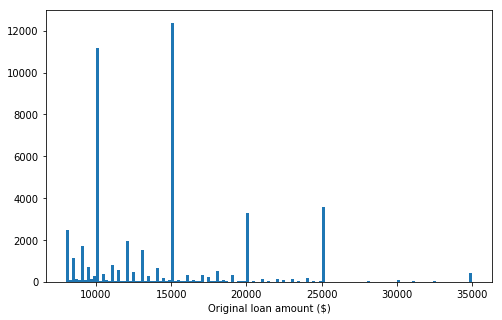

In [82]:
bins = np.arange(8000, loan_sub.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');


The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. This would seem to indicate very common loan amounts. There are also small spikes at 8k,9k,11k,12k,13k,14k etc. It means that most of the loans are multiples of 1k.

Now, look at the distributions of other variables of interest stated monthly income

Whether this is gross or net monthly income is not stated, I am going to assume this is gross knowing this is what lenders usually desire in order to qualify higher loan amounts.

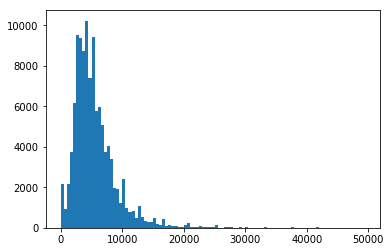

In [13]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = loan_sub, x = 'StatedMonthlyIncome', bins=bins_smi);

The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 30k.

In [14]:
# Check borrowers with stated monthly income greater than 1e5
loan_sub[loan_sub.StatedMonthlyIncome>1e5]

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
8066,2000,0.35643,4.166667e+05,36,HR,Employed
8870,12500,0.12700,2.083333e+05,36,NaN,Not available
17411,7500,0.35643,4.833333e+05,36,E,Employed
35218,1000,0.07389,1.083333e+05,36,AA,Full-time
45028,4000,0.33973,1.500000e+05,36,E,Self-employed
53014,4000,0.25785,6.185478e+05,12,D,Self-employed
53167,4000,0.35797,1.750003e+06,36,HR,Self-employed
56867,25000,0.11144,1.850818e+05,36,NaN,Self-employed
57133,4000,0.35643,4.666667e+05,36,E,Employed
59298,15000,0.24246,1.208333e+05,36,C,Self-employed


In [83]:
# Get percent of borrowers whose stated monthly income was greater than 30k
(loan_sub.StatedMonthlyIncome>30000).sum()/float(loan_sub.shape[0])

0.0

Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seen as outliers for the following analysis, so we will remove borrower records with income greater than 30k.

In [84]:
# remove loans with stated monthly income greater than 30k, which are outliers
loan_sub = loan_sub[loan_sub.StatedMonthlyIncome<=30000]

In [85]:
(loan_sub.StatedMonthlyIncome>30000).sum()

0

Look at distributions of term, Prosper rating and employment status

In [86]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_sub['ProsperRating (Alpha)'] = loan_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)

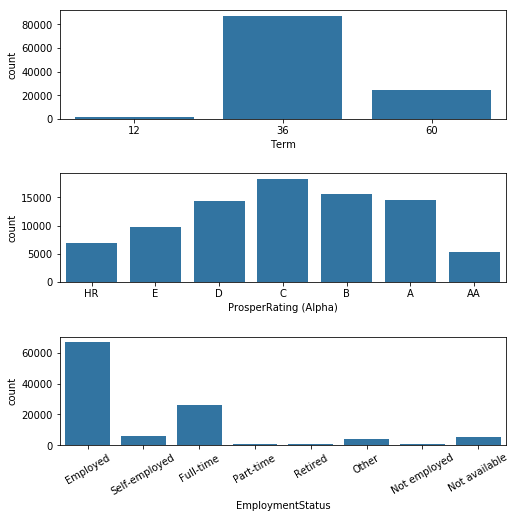

In [87]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])
default_color = sb.color_palette()[0]
plt.subplots_adjust(hspace = 0.5)
sb.countplot(data = loan_sub, x = 'Term', color = default_color, ax = ax[0])

sb.countplot(data = loan_sub, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])

sb.countplot(data = loan_sub, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=30);

The length of most of the loans are 36 months. The ratings of most of the borrowers are among D to A. Most of borrowers are employed and full-time.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions of stated monthly income is highly right screwed. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 100k. Surprisingly, most of borrowers with greater than 100k monthly income only loan less than 5k dollars. So, the very large stated monthly income may be made up. Overall, Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seen as outliers for the following analysis, so we removed borrower records with income greater than 30k.

There is no need to perform any transformations.

## Bivariate Exploration

Let's look at the pairwise correlations present between features in the data.

In [88]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

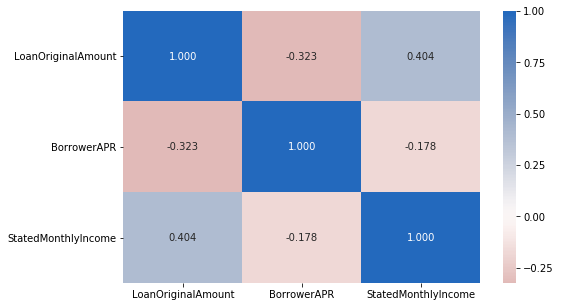

In [89]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_sub[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

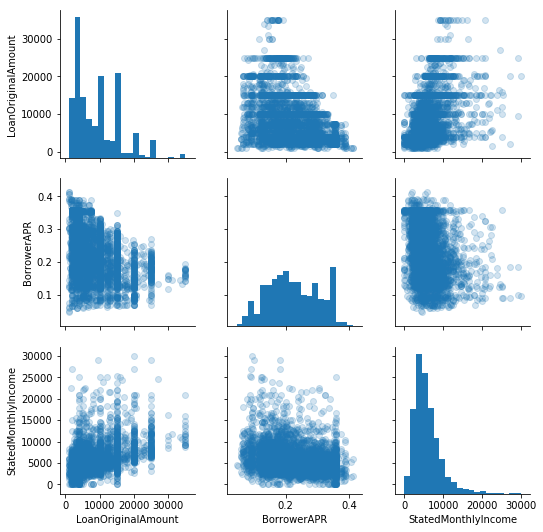

In [90]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
loan_sub_samp = loan_sub.sample(5000)
g = sb.PairGrid(data = loan_sub_samp.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

Let's look at how borrower APR, stated monthly income and loan original amount correlate with the categorical variables

<Figure size 720x720 with 0 Axes>

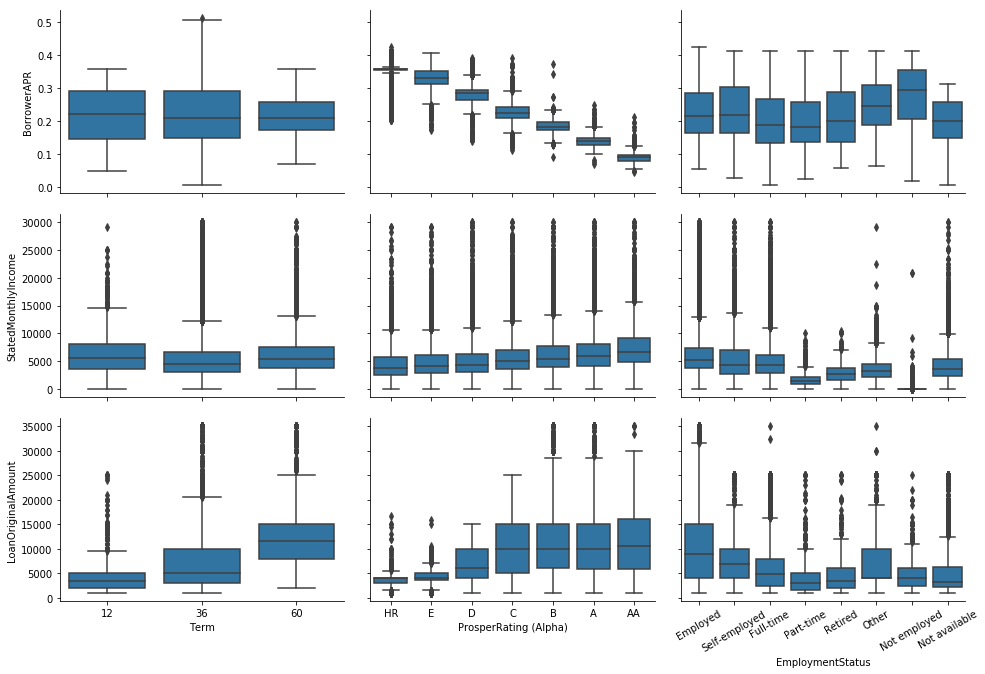

In [91]:
# plot matrix of numeric features against categorical features

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_sub, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cat_vars, height = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that the loan amount is increased with the increase of loan term. The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

Let's look at the relationships between the three categorical features.

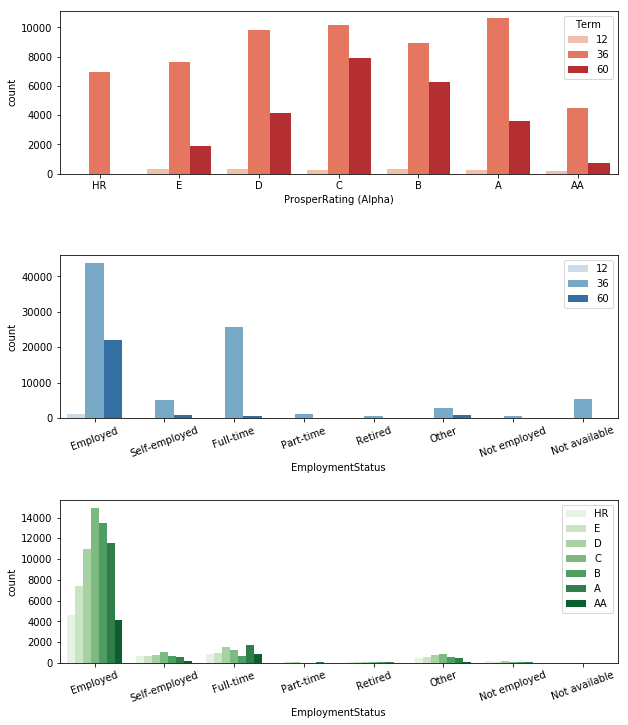

In [92]:
plt.figure(figsize = [10, 12])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
plt.subplots_adjust(hspace = 0.5); # prevent overlappiung plots
sb.countplot(data = loan_sub, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Reds')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
ax.legend(loc = 1, ncol = 1); # re-arrange legend to prevent centering in plot
plt.xticks(rotation=20)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_sub, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 1); # re-arrange legend to prevent centering in plot
plt.xticks(rotation=20);

The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables. But we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers

With the preliminary look at bivariate relationships completed, let's see how borrower APR and loan original amount are related to one another for all of the data

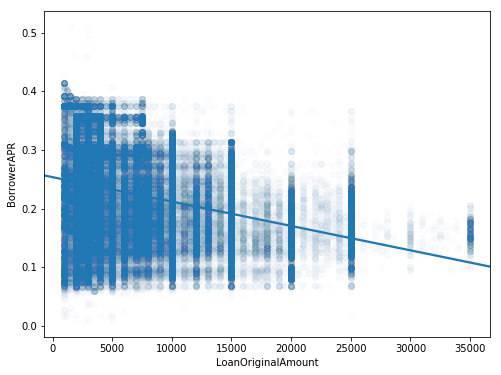

In [93]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

This plot shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. I found this interesting. At least in this data set the lender seems to make a small sacrifice in the BorrowerAPR. This in turn I would suspect would make a higher LoanOriginalAmount more attractive depending on the circumstances. Overall, the borrower APR is negatively correlated with loan amount. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The Prosper rating also has a strong effect on the borrower APR, which decreases with the better rating.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. It also shows that borrowers with better rating also have larger monthly income and loan amount. There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating and term) play into the relationship between borrower APR and loan original amount.

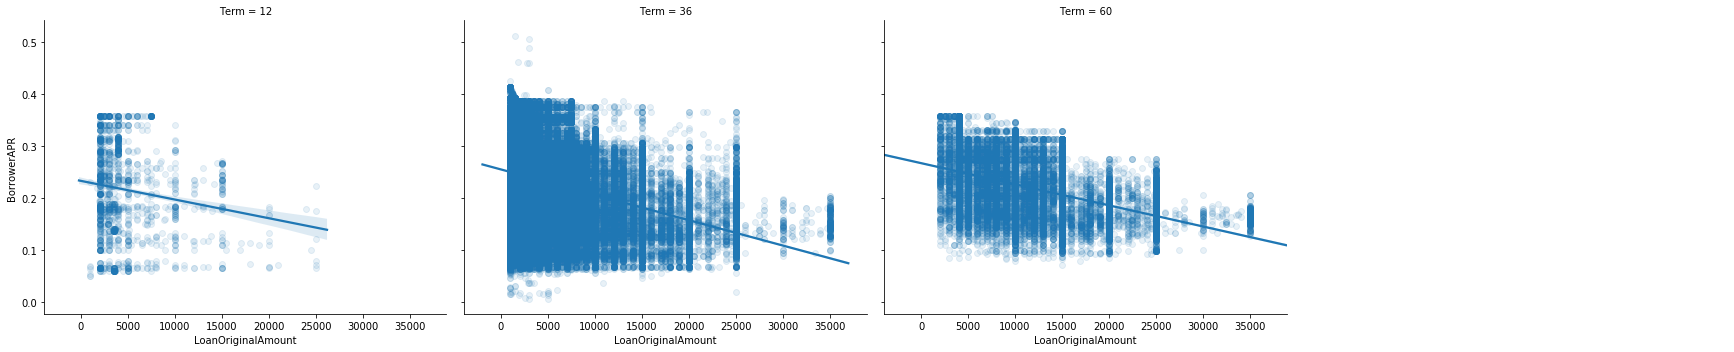

In [72]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_sub, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.1});
g.add_legend();

Term doesn't seem to have effect on relationship of APR and loan amount

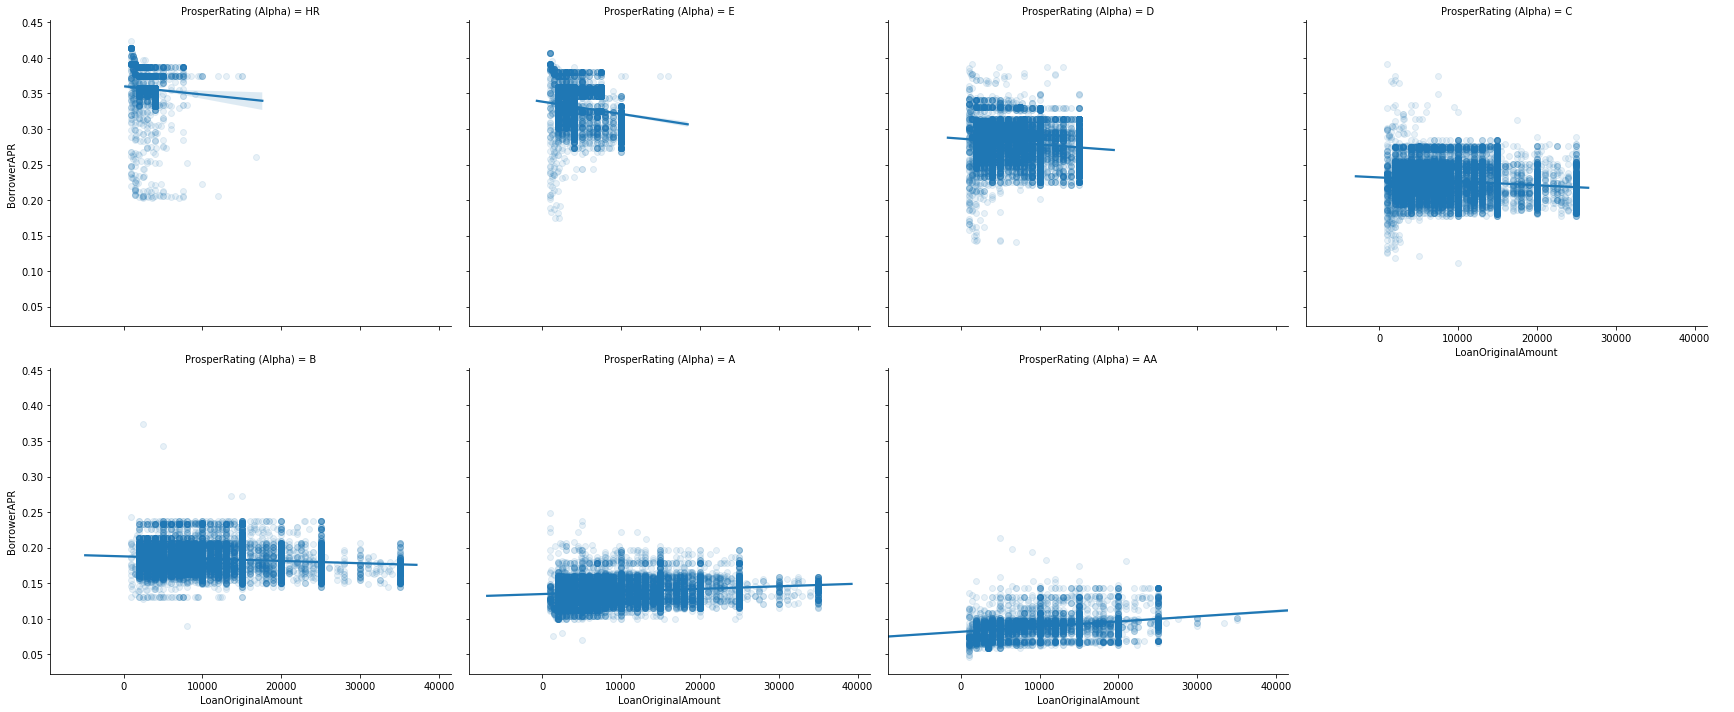

In [73]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_sub, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.1});
g.add_legend();

The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

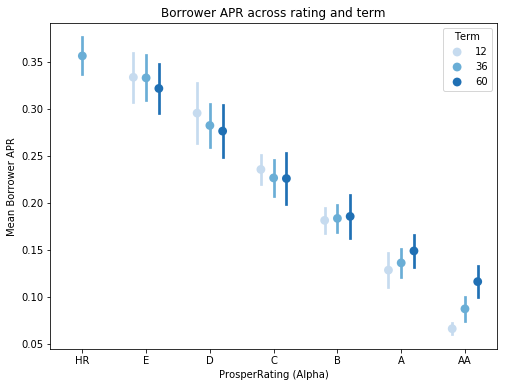

In [74]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

Then, look at the rating and term effects on stated monthly income and loan original amount variables

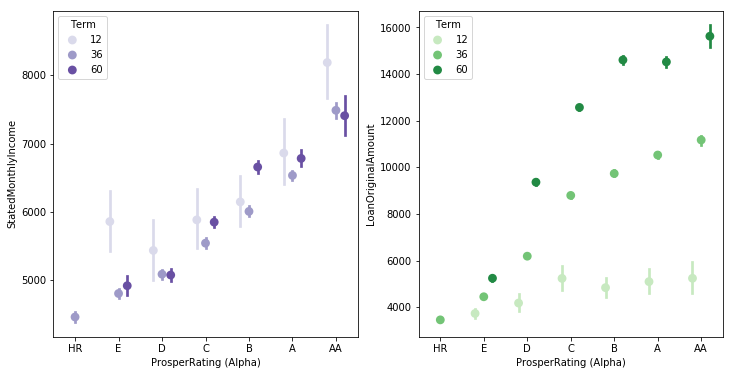

In [75]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger. 

### Were there any interesting or surprising interactions between features?

A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.